In [2]:
folder = "drive/My Drive/Colab Notebooks/KOI_Data/"
folder = "../../KOI_Data/"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def impute_on_pandas(df):
    return df.fillna(df.median(),inplace=False)

#df_sets = pd.read_csv(folder+"/koi_sets_unb.csv")
#mask_train = (df_sets["Set"] == "Train").values
#mask_test = (df_sets["Set"] == "Test").values
#mask_unlabeled = (df_sets["Set"] == "Unlabeled").values
#df_meta_train = df_meta[mask_train]
#df_meta_test = df_meta[mask_test]
#df_meta_unb = df_meta[mask_unlabeled]

df_meta = pd.read_csv(folder+"/koi_metadata.csv")
df_meta.head()

,KOI Name,NExScI Disposition,Kepler Name,Period,Time of Transit Epoch,First Transit Time (BJD),Impact Parameter,Duration,Transit Depth,r/R,...,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass,Max single event sigma,Max Multievent sigma,Transit Model SNR,KOI count,Transit Number
0,K00889.01,CONFIRMED,Kepler-75 b,8.884923,169.991686,2455002.992,0.069,2.07004,16053.4,0.114,...,5332.0,4.500,-0.08,0.843,0.821,61.291,474.021,388.2,1,153
1,K01009.01,FALSE POSITIVE,NaN,5.092465,357.535940,2455190.536,0.161,3.65900,254.0,0.014,...,5037.0,4.547,-0.20,0.751,0.727,3.648,15.175,17.1,1,225
2,K07621.01,FALSE POSITIVE,NaN,275.073650,315.248600,2455148.249,0.595,3.37000,228.9,0.014,...,5604.0,4.226,-0.12,1.187,0.864,5.909,8.012,7.5,1,4
3,K06252.01,FALSE POSITIVE,NaN,8.460439,133.774490,2454966.774,1.061,4.73492,76412.9,0.478,...,5951.0,4.638,-1.06,0.702,0.796,452.526,3704.503,1797.4,1,164
4,K00958.01,CANDIDATE,NaN,21.761298,166.540438,2454999.540,0.123,1.24300,1300.7,0.032,...,4859.0,4.612,0.00,0.720,0.781,19.204,96.205,60.0,1,62


,Period,First Transit Time (BJD),Duration,Inclination,Semi-major Axis,r/R,Teq,Transit Number,Limb Darkening Coeff1,Limb Darkening Coeff2
Period,1.000000,0.616285,0.348810,0.189294,0.971533,-0.026161,-0.349195,-0.277104,-0.009711,0.003053
First Transit Time (BJD),0.616285,1.000000,0.203726,0.142303,0.614260,0.009635,-0.272567,-0.233885,0.016486,-0.016776
Duration,0.348810,0.203726,1.000000,-0.178945,0.384052,0.035369,-0.183515,-0.245439,-0.082972,0.060367
Inclination,0.189294,0.142303,-0.178945,1.000000,0.243225,-0.111479,-0.404930,-0.433940,0.147784,-0.120093
Semi-major Axis,0.971533,0.614260,0.384052,0.243225,1.000000,-0.026587,-0.420240,-0.373006,-0.019488,0.008950
r/R,-0.026161,0.009635,0.035369,-0.111479,-0.026587,1.000000,0.032479,-0.029710,-0.056983,0.045485
Teq,-0.349195,-0.272567,-0.183515,-0.404930,-0.420240,0.032479,1.000000,0.606480,-0.082827,-0.000963
Transit Number,-0.277104,-0.233885,-0.245439,-0.433940,-0.373006,-0.029710,0.606480,1.000000,-0.022144,0.012807
Limb Darkening Coeff1,-0.009711,0.016486,-0.082972,0.147784,-0.019488,-0.056983,-0.082827,-0.022144,1.000000,-0.966637
Limb Darkening Coeff2,0.003053,-0.016776,0.060367,-0.120093,0.008950,0.045485,-0.000963,0.012807,-0.966637,1.000000


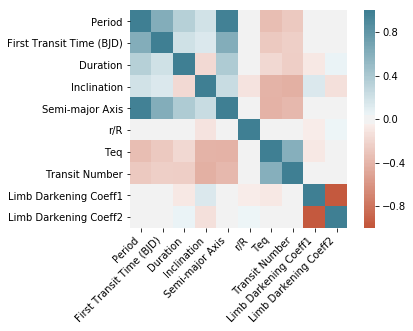

In [4]:


metadata_used = ["NExScI Disposition", 
                 "Period","First Transit Time (BJD)", "Duration",
                 "Inclination", "Semi-major Axis", "r/R",
                 "Teq", "Transit Number", "Limb Darkening Coeff1", "Limb Darkening Coeff2"]
df_meta_obj = df_meta[metadata_used]

df_meta_obj = impute_on_pandas(df_meta_obj)
corr = df_meta_obj.corr()


ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

corr


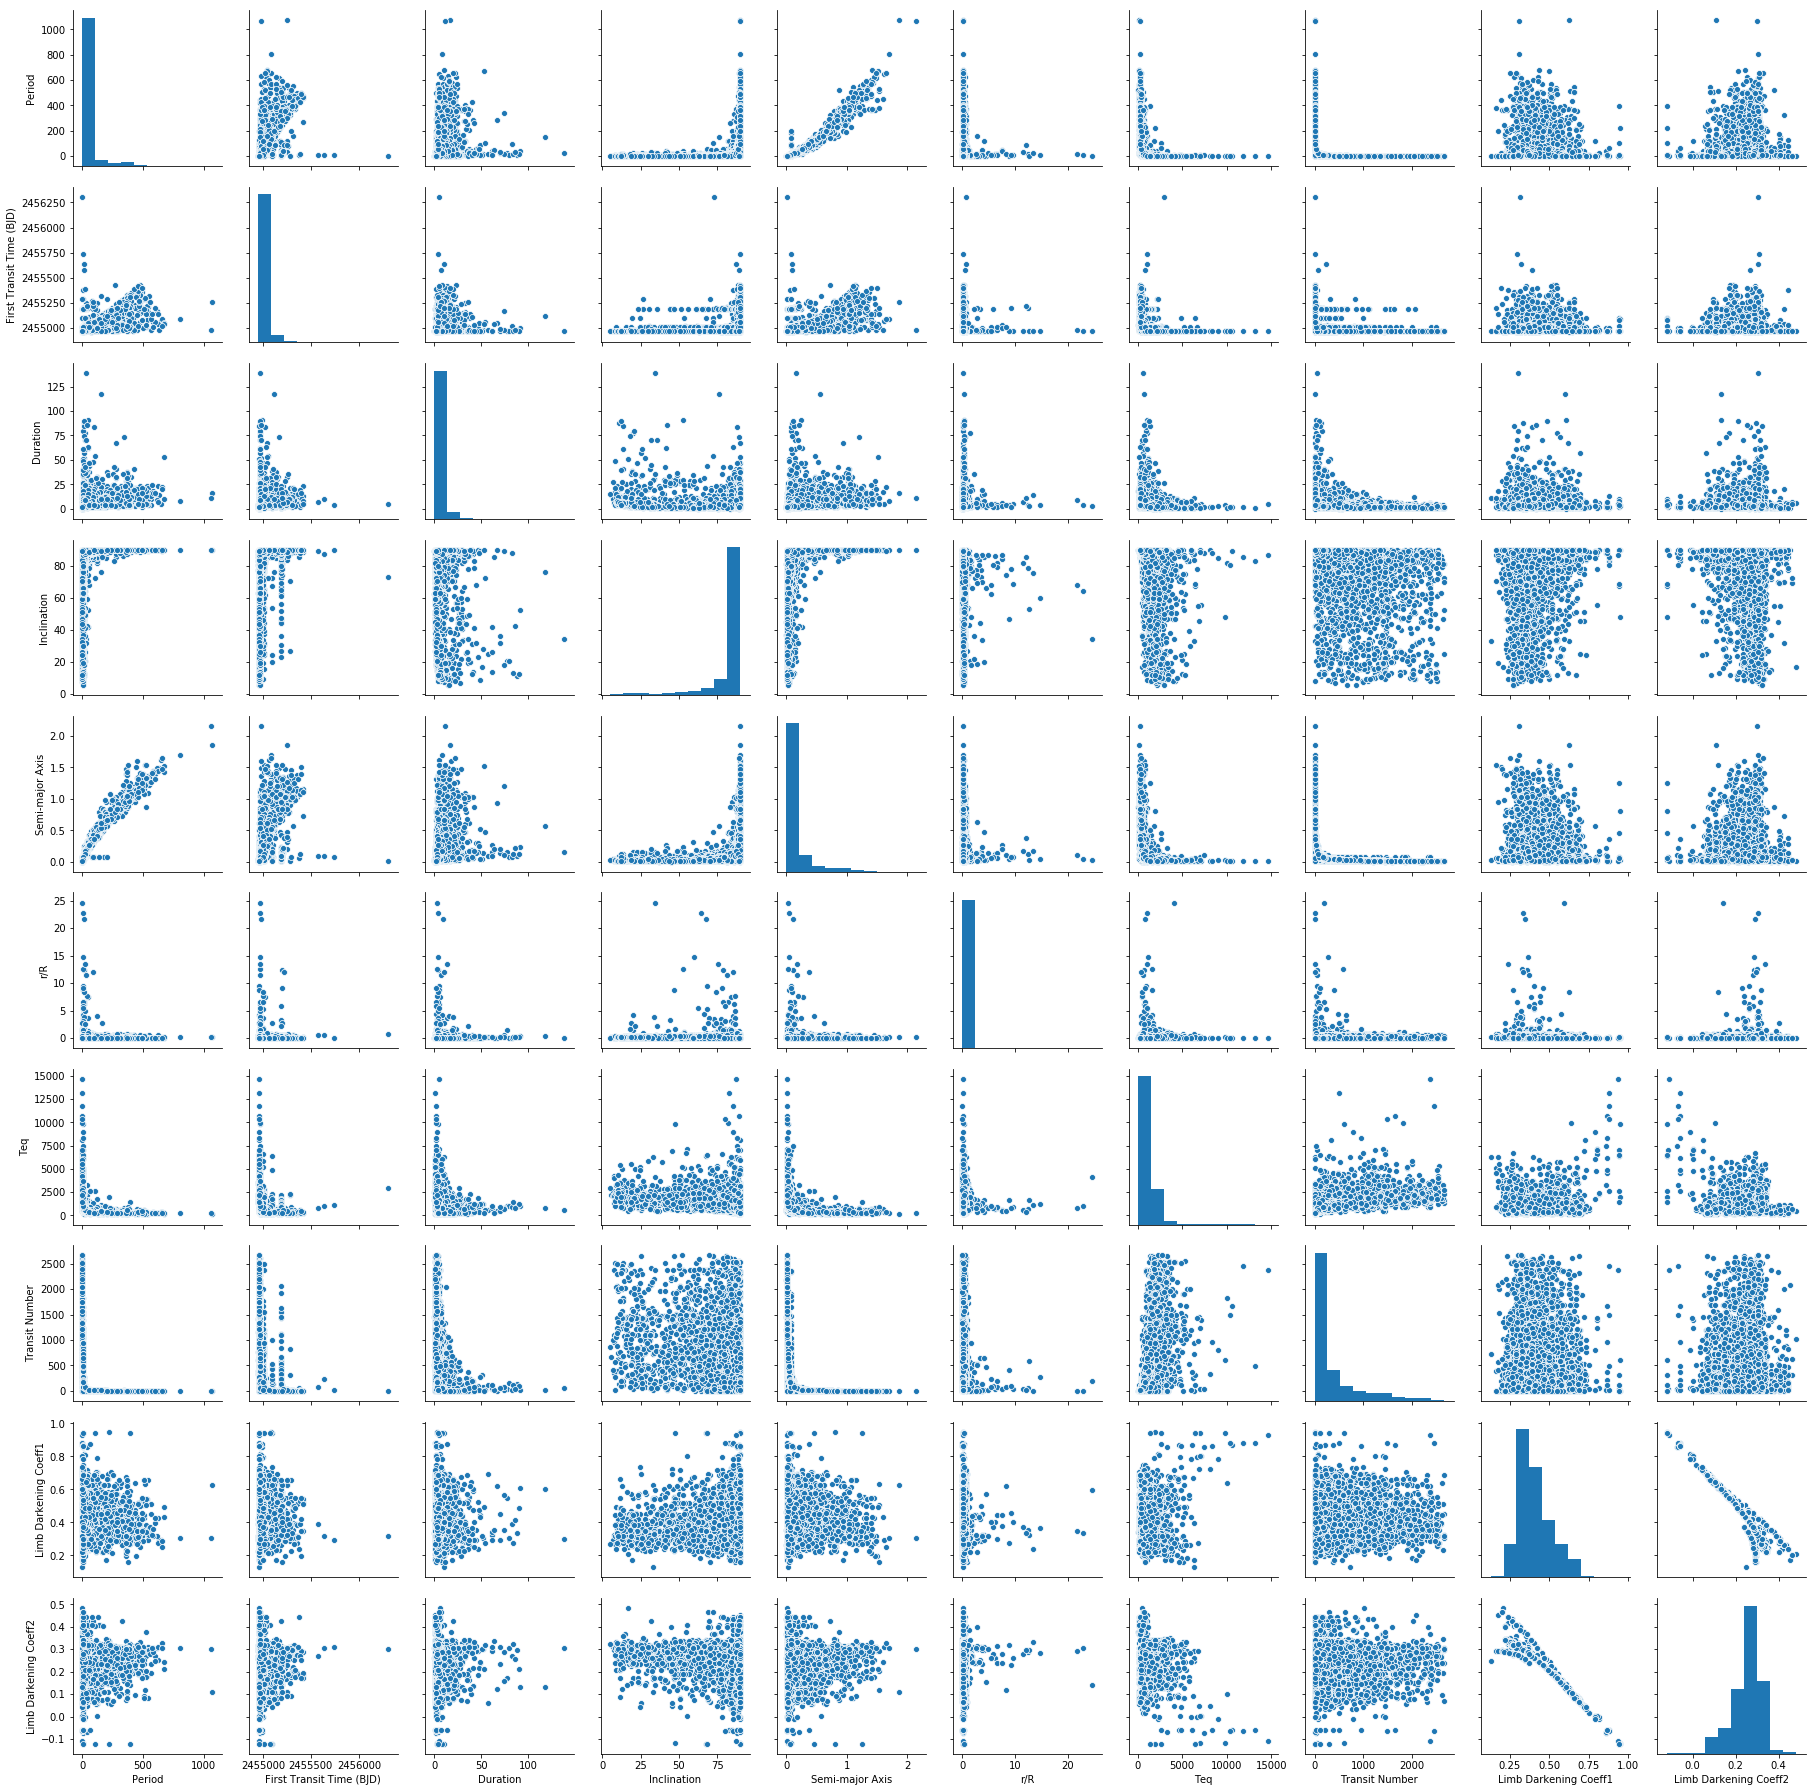

In [7]:
pp = sns.pairplot(data=df_meta_obj,
                  y_vars=df_meta_obj.columns[1:],
                  x_vars=df_meta_obj.columns[1:])